In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_premier = pd.read_csv('cleaned_data\Premier_league.csv')
df_premier.head()

,Unnamed: 0,Team_1,Team_2,League_Rank_1,League_Rank_2,Games_played_1,Games_played_2,Points_1,Points_2,Won_1,...,Results_1,Results_2,H2H_Side,H2H_Outcome,H2H_Goals_Home,H2H_Goals_Away,Goals_scored_diff,Goals_Rec_diff,Goals_Diff_diff,Diff_Goal_Match
0,0,manchester c,liverpool,3,1,20,20,47,54,15,...,2,1,A,D,0,0,6,8,-2,1
1,1,newcastle,manchester u,15,6,20,20,18,35,4,...,0,2,A,L,2,3,-26,-5,-21,-2
2,2,brighton,liverpool,13,1,21,21,26,54,7,...,0,1,A,L,0,1,-25,19,-44,-1
3,3,manchester united,brighton and hove albion,6,13,22,22,41,26,12,...,2,1,A,L,2,3,20,2,18,1
4,4,chelsea,newcastle,4,15,21,21,44,18,13,...,2,1,A,W,2,1,23,-13,36,1


In [9]:
df_premier.columns

Index(['Unnamed: 0', 'Team_1', 'Team_2', 'League_Rank_1', 'League_Rank_2',
       'Games_played_1', 'Games_played_2', 'Points_1', 'Points_2', 'Won_1',
       'Draw_1', 'Lost_1', 'Won_2', 'Draw_2', 'Lost_2', 'Goals_Scored_1',
       'Goals_Scored_2', 'Goals_Rec_1', 'Goal_Rec_2', 'Goals_Diff_1',
       'Goals_Diff_2', 'League_type_country', 'Large_Diff_win', 'Won_out_of_6',
       'Avrage_FT_Goal', 'Average_HT_Goal', 'Results_1', 'Results_2',
       'H2H_Side', 'H2H_Outcome', 'H2H_Goals_Home', 'H2H_Goals_Away',
       'Goals_scored_diff', 'Goals_Rec_diff', 'Goals_Diff_diff',
       'Diff_Goal_Match'],
      dtype='object')

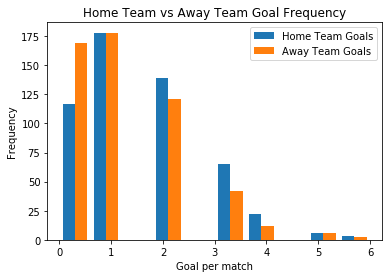

In [10]:
# Splitting the results for the home team and the away team
home_team = df_premier['Results_1']
away_team = df_premier['Results_2']
plt.hist([home_team, away_team], label=("Home Team Goals", "Away Team Goals"))
plt.title("Home Team vs Away Team Goal Frequency")
plt.xlabel("Goal per match")
plt.ylabel("Frequency")
plt.legend()

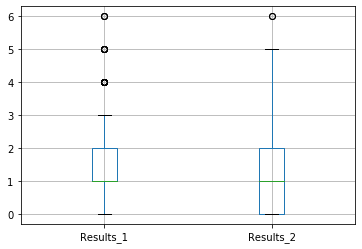

In [11]:
df_premier.boxplot(column = ['Results_1', 'Results_2'])

Text(0.5, 0, 'Diff_Goal_Match')

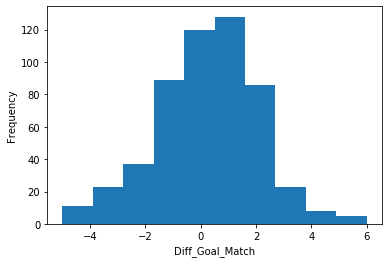

In [12]:
df_premier['Diff_Goal_Match'].plot.hist()
plt.xlabel('Diff_Goal_Match')

Text(0.5, 0, 'Goals_scored_diff')

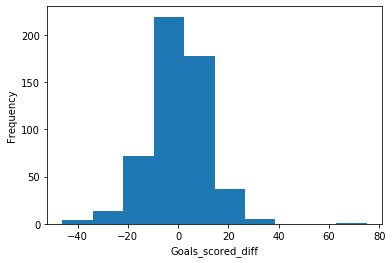

In [13]:
df_premier['Goals_scored_diff'].plot.hist()
plt.xlabel('Goals_scored_diff')

Text(0.5, 0, 'Goals_Rec_diff')

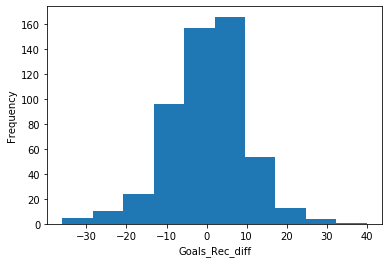

In [14]:
df_premier['Goals_Rec_diff'].plot.hist()
plt.xlabel('Goals_Rec_diff')

Text(0.5, 0, 'Goals_Diff_diff')

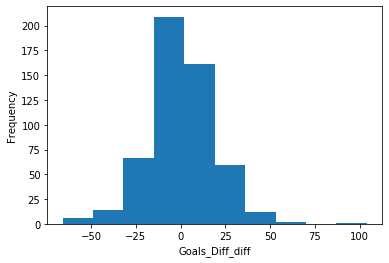

In [15]:
df_premier['Goals_Diff_diff'].plot.hist()
plt.xlabel('Goals_Diff_diff')

**EDA Observations Pt.1**

As we can see, the final score for the Home Team ('Results_1') is greater than the Away Team ('Results_2') which matches with the initial prediction. This means that, in average, the Home Team has a greater advantage compared to the Away side when it comes to winning a match, which can determine how the fanbase and stadium might affect a team's performance when playing. 

Looking at the histograms, we can see how the final goals scored by the Home Team is in average greater than the Away Team. We can see that the Result for of one goal for the Home Team is about the same frequency as the Away Team, but the distribution for more than one goal is less while for zero goals is way higher for the Away Team.

For the boxplots, we can see that IQR for the Home Team (Results_1) is smaller in size but greater in value, ranging from 1 to 2, while the Away Team (Results_2) is greater in size but in value it ranges from 0 to 2. This matches with the great frequency of zeros shown in the histogram, as well as the Quartile 1 for the Away Team to be at zero. Given that the Away Team has a bigger IQR, the Maximum is the box plot is bigger than the Home Team, which leads to outliers only at 6 goals, while the Home Team's outliers are considered 4, 5 and 6 goals. However, we will not be rulling out outliers in this model.


In [16]:
df_premier.columns

Index(['Unnamed: 0', 'Team_1', 'Team_2', 'League_Rank_1', 'League_Rank_2',
       'Games_played_1', 'Games_played_2', 'Points_1', 'Points_2', 'Won_1',
       'Draw_1', 'Lost_1', 'Won_2', 'Draw_2', 'Lost_2', 'Goals_Scored_1',
       'Goals_Scored_2', 'Goals_Rec_1', 'Goal_Rec_2', 'Goals_Diff_1',
       'Goals_Diff_2', 'League_type_country', 'Large_Diff_win', 'Won_out_of_6',
       'Avrage_FT_Goal', 'Average_HT_Goal', 'Results_1', 'Results_2',
       'H2H_Side', 'H2H_Outcome', 'H2H_Goals_Home', 'H2H_Goals_Away',
       'Goals_scored_diff', 'Goals_Rec_diff', 'Goals_Diff_diff',
       'Diff_Goal_Match'],
      dtype='object')

In [17]:
# Correlation data Home Team
corr_Home = df_premier[['Results_1', 'League_Rank_1', 'Goals_Scored_1', 'Goals_Rec_1', 'Goals_Diff_1', 'H2H_Goals_Home', 'League_Rank_2', 'Goal_Rec_2', 'Goals_Diff_2']].corr()

In [18]:
# Correlation data Away Team
corr_Away = df_premier[['Results_2', 'League_Rank_2', 'Goals_Scored_2', 'Goal_Rec_2', 'Goals_Diff_2', 'H2H_Goals_Away', 'League_Rank_1', 'Goals_Rec_1', 'Goals_Diff_1']].corr()

Text(0.5, 1, 'Home Team Correlation')

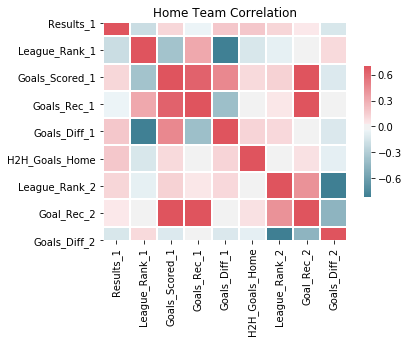

In [28]:
cmap = sns.diverging_palette(220,10, as_cmap=True) 
sns.heatmap(corr_Home, vmax=0.7, center=0, cmap=cmap, square=True, 
            linewidth=1, cbar_kws={"shrink": 0.6}).set_title("Home Team Correlation")

Text(0.5, 1, 'Away Team Correlation')

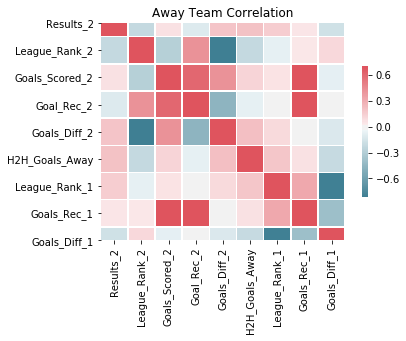

In [29]:
sns.heatmap(corr_Away, vmax=0.7, center=0, cmap=cmap, square=True, 
            linewidth=0.5, cbar_kws={"shrink": 0.6}).set_title("Away Team Correlation")

**EDA Observations Pt.2**

The negative correlation occurs when a number decrease one increases. So, if a team is ranked higher (low number), then the goal difference should increase leading to a negati correlation.

We can se how for the both Results sections, which is the area we are interested in, we can see that there is a significant correlation with the goal difference (Goals_Diff) and the previous match goals (H2H_Goals). There is a less significant relationship with the total scored goals in the season (Goals_Scored). And there is a negative correlation with the received goals (Goal_Rec) and the league rank (League_Rank). For soccer fans, this makes a lot of sense.

In [30]:
df_premier.columns

Index(['Unnamed: 0', 'Team_1', 'Team_2', 'League_Rank_1', 'League_Rank_2',
       'Games_played_1', 'Games_played_2', 'Points_1', 'Points_2', 'Won_1',
       'Draw_1', 'Lost_1', 'Won_2', 'Draw_2', 'Lost_2', 'Goals_Scored_1',
       'Goals_Scored_2', 'Goals_Rec_1', 'Goal_Rec_2', 'Goals_Diff_1',
       'Goals_Diff_2', 'League_type_country', 'Large_Diff_win', 'Won_out_of_6',
       'Avrage_FT_Goal', 'Average_HT_Goal', 'Results_1', 'Results_2',
       'H2H_Side', 'H2H_Outcome', 'H2H_Goals_Home', 'H2H_Goals_Away',
       'Goals_scored_diff', 'Goals_Rec_diff', 'Goals_Diff_diff',
       'Diff_Goal_Match'],
      dtype='object')

In [31]:
# Filtering the columns to be used in the model
df_premier_eda = df_premier[['Results_1', 'Results_2', 'League_Rank_1', 'League_Rank_2', 'Goals_Scored_1', 'Goals_Scored_2', 'Goals_Rec_1', 'Goal_Rec_2', 'Goals_Diff_1', 'Goals_Diff_2', 'H2H_Goals_Home', 'H2H_Goals_Away', 'Diff_Goal_Match']]

In [32]:
df_premier_eda.to_csv('eda_data\Premier_eda_data.csv')

In [33]:
# Creating pivot table
df_premier_pivot = df_premier[['League_Rank_1', 'League_Rank_2', 'Goals_Scored_1', 'Goals_Scored_2', 'Goals_Rec_1', 'Goal_Rec_2', 'Goals_Diff_1', 'Goals_Diff_2', 'H2H_Goals_Home', 'H2H_Goals_Away', 'Diff_Goal_Match', 'Results_1', 'Results_2']]

In [34]:
# Getting all the rows
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [35]:
# Home Team rank
print('League_Rank_1')
pd.pivot_table(df_premier_pivot, values=['Results_1', 'Results_2'], index=['League_Rank_1'])

League_Rank_1


,Results_1,Results_2
League_Rank_1,,
1,1.857143,0.821429
2,2.000000,0.965517
3,2.033333,1.000000
4,1.521739,1.000000
5,1.541667,1.000000
6,1.850000,0.950000
7,1.347826,1.000000
8,1.142857,1.178571
9,1.739130,1.217391


In [36]:
# Away Team rank
print('League_Rank_2')
pd.pivot_table(df_premier_pivot, values=['Results_1', 'Results_2'], index=['League_Rank_2'])

League_Rank_2


,Results_1,Results_2
League_Rank_2,,
1,1.222222,1.694444
2,1.192308,1.307692
3,1.222222,1.703704
4,1.250000,1.218750
5,1.380952,1.285714
6,1.250000,1.625000
7,1.583333,1.375000
8,1.833333,1.458333
9,1.347826,1.304348


In [37]:
# Goals scored Home Team (Season)
print('Goals_Scored_1')
pd.pivot_table(df_premier_pivot, values=['Results_1', 'Results_2'], index=['Goals_Scored_1'])

Goals_Scored_1


,Results_1,Results_2
Goals_Scored_1,,
0,1.545455,1.727273
1,0.500000,1.250000
2,1.285714,1.714286
3,1.333333,1.555556
4,1.000000,1.750000
5,1.315789,1.157895
6,1.636364,0.363636
7,1.857143,0.857143
8,1.545455,1.090909


In [38]:
# Goals scored Away Team (Season)
pd.pivot_table(df_premier_pivot, values=['Results_1', 'Results_2'], index=['Goals_Scored_2'])

,Results_1,Results_2
Goals_Scored_2,,
0,1.500000,1.200000
1,1.800000,1.200000
2,1.727273,1.454545
3,1.750000,0.583333
4,1.166667,1.166667
5,1.500000,1.833333
6,2.000000,1.294118
7,1.636364,0.909091
8,1.307692,1.076923


In [39]:
# Goals Received Away Team (Season)
pd.pivot_table(df_premier_pivot, values=['Results_1', 'Results_2'], index=['Goals_Rec_1'])

,Results_1,Results_2
Goals_Rec_1,,
0,1.333333,1.444444
1,2.500000,1.000000
2,1.769231,1.230769
3,1.631579,1.052632
4,1.000000,1.285714
5,2.090909,1.181818
6,2.000000,1.000000
7,1.700000,0.800000
8,1.250000,1.625000


In [40]:
# Goals Received Away Team (Season)
pd.pivot_table(df_premier_pivot, values=['Results_1', 'Results_2'], index=['Goal_Rec_2'])

,Results_1,Results_2
Goal_Rec_2,,
0,1.363636,1.636364
1,1.333333,1.333333
2,1.000000,1.272727
3,0.750000,1.416667
4,1.294118,1.411765
5,1.357143,1.428571
6,1.600000,1.000000
7,1.333333,1.333333
8,1.222222,1.222222


In [41]:
# Goal Diff Home Team (Season)
pd.pivot_table(df_premier_pivot, values=['Results_1', 'Results_2'], index=['Goals_Diff_1'])

,Results_1,Results_2
Goals_Diff_1,,
-35,3.000000,2.000000
-33,1.000000,2.000000
-30,3.000000,1.000000
-29,1.000000,2.000000
-28,1.000000,2.000000
-26,1.000000,0.500000
-25,1.000000,0.000000
-24,1.333333,2.000000
-23,1.500000,1.000000


In [42]:
# Goal Diff Away Team (Season)
pd.pivot_table(df_premier_pivot, values=['Results_1', 'Results_2'], index=['Goals_Diff_2'])

,Results_1,Results_2
Goals_Diff_2,,
-43,2.000000,1.000000
-33,1.000000,2.000000
-28,1.500000,0.500000
-27,3.000000,3.000000
-26,2.000000,1.000000
-25,3.000000,0.666667
-24,2.000000,0.500000
-23,2.000000,1.000000
-22,1.750000,0.500000


In [43]:
# Previous match Goals Home Team
print("Previous match Goals Home Team")
pd.pivot_table(df_premier_pivot, values=['Results_1', 'Results_2'], index=['H2H_Goals_Home'])

Previous match Goals Home Team


,Results_1,Results_2
H2H_Goals_Home,,
0,1.253521,1.345070
1,1.391304,1.315217
2,1.623932,1.051282
3,1.773585,0.867925
4,1.904762,1.047619
5,2.000000,1.000000
6,3.500000,0.500000


In [46]:
# Previous match Goals Away Team
print("Previous match Goals Away Team")
pd.pivot_table(df_premier_pivot, values=['Results_1', 'Results_2'], index=['H2H_Goals_Away'])

Previous match Goals Away Team


,Results_1,Results_2
H2H_Goals_Away,,
0,1.517007,0.823129
1,1.557377,1.245902
2,1.339450,1.394495
3,1.423729,1.288136
4,1.434783,1.695652
5,1.666667,3.000000
6,1.833333,1.833333


In [45]:
# Goal difference in the previous match (Home - Away)
pd.pivot_table(df_premier_pivot, values=['Results_1', 'Results_2'], index=['Diff_Goal_Match'])

,Results_1,Results_2
Diff_Goal_Match,,
-5,0.000000,5.000000
-4,0.600000,4.600000
-3,0.347826,3.347826
-2,0.324324,2.324324
-1,0.696629,1.696629
0,1.066667,1.066667
1,1.703125,0.703125
2,2.523256,0.523256
3,3.173913,0.173913
